# Exemplo de Plataforma de Recomendação de Filmes

In [142]:
#import dos pré requisitos
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances
import matplotlib.pyplot as plt

Exemplo baseado no livro:

SEGARAN, Toby. Programming Collective Intelligence: Building Smart Web 2.0 Applications. O'Really 2008

http://shop.oreilly.com/product/9780596529321.do

Carregamos as avaliações dos usuários na plataforma.
    - Gene Seymour
    - Michael Phillips
    - Lisa Rose
    - Mick LaSalle
    - Claudia Puig
    - Toby
    - Jack Matthews
    
Para cada um dos filmes disponíveis.
    - Lady in the Water
    - Snakes on a Plane
    - Just My Luck
    - Superman Returns
    - You, Me and Dupree
    - The Night Listener
 
Com avaliações de 0.0 a 5.0 pontos em intervalos de 0.5

In [143]:
#carrega em dicionário as informações de avaliação por usuário
def userDict(user="", movie=""):
    critics={'Lisa Rose': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.5, 'Just My Luck': 3.0, 'Superman Returns': 3.5, 'You, Me and Dupree': 2.5, 'The Night Listener': 3.0},
    'Gene Seymour': {'Lady in the Water': 3.0, 'Snakes on a Plane': 3.5, 'Just My Luck': 1.5, 'Superman Returns': 5.0, 'The Night Listener': 3.0, 'You, Me and Dupree': 3.5},
    'Michael Phillips': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.0, 'Superman Returns': 3.5, 'The Night Listener': 4.0},
    'Claudia Puig': {'Snakes on a Plane': 3.5, 'Just My Luck': 3.0, 'The Night Listener': 4.5, 'Superman Returns': 4.0, 'You, Me and Dupree': 2.5},
    'Mick LaSalle': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0, 'Just My Luck': 2.0, 'Superman Returns': 3.0, 'The Night Listener': 3.0, 'You, Me and Dupree': 2.0}, 
    'Jack Matthews': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0, 'The Night Listener': 3.0, 'Superman Returns': 5.0, 'You, Me and Dupree': 3.5},
    'Toby': {'Snakes on a Plane':4.5,'You, Me and Dupree':1.0,'Superman Returns':4.0}
    }
    if user != "":
        if user in critics:
            return critics[user]
    if movie != "":
        dict_ = {}
        for k in critics.keys():
            if movie in critics[k]:
                dict_[k] = critics[k].get(movie)
        if dict_ != {}:
            return dict_
    return critics

#constroi o dicionário
userdata = userDict()

#transforma os dados em um dataset
movies = []
users = []
for user in userdata.keys():
    users.append(user)

    for f in userdata[user]:
        movies.append(f)

movies = np.unique(movies)

dataset = []
for idx, u in enumerate(users):
    aux = []
    for f in movies:
        if f in userdata[u]:
            aux.append(userdata[u][f])
        else:
            aux.append(0)
    dataset.append(aux)

#lista de filmes, usuários e os dados de avaliação [filme x usuário]
list(movies), users, dataset

(['Just My Luck',
  'Lady in the Water',
  'Snakes on a Plane',
  'Superman Returns',
  'The Night Listener',
  'You, Me and Dupree'],
 ['Claudia Puig',
  'Jack Matthews',
  'Toby',
  'Michael Phillips',
  'Gene Seymour',
  'Mick LaSalle',
  'Lisa Rose'],
 [[3.0, 0, 3.5, 4.0, 4.5, 2.5],
  [0, 3.0, 4.0, 5.0, 3.0, 3.5],
  [0, 0, 4.5, 4.0, 0, 1.0],
  [0, 2.5, 3.0, 3.5, 4.0, 0],
  [1.5, 3.0, 3.5, 5.0, 3.0, 3.5],
  [2.0, 3.0, 4.0, 3.0, 3.0, 2.0],
  [3.0, 2.5, 3.5, 3.5, 3.0, 2.5]])

In [144]:
def get_vectors(person1, person2):
    p1 = []
    p2 = []
    movie = []
    for k in person1.keys():
        if k in person2.keys():
            p1.append(person1[k])
            p2.append(person2[k])
            movie.append(k)
    return p1, p2, movie

# calcula a similaridade entre dois usuários padrão cosseno ( simcos = 1 - cosine distance )
def sim_distance(person1,person2):
    '''
    *** Sklearn Metrics ‘cityblock’ | ‘cosine’ | ‘euclidean’ | ‘l1’ | ‘l2’ | ‘manhattan’ 
    *** Scipy Metrics ‘braycurtis’ | ‘canberra’ | ‘chebyshev’ | ‘correlation’ | ‘dice’ | ‘hamming’ | ‘jaccard’ |
    ‘kulsinski’ | ‘mahalanobis’ | ‘matching’ | ‘minkowski’ | ‘rogerstanimoto’ | ‘russellrao’ | ‘seuclidean’ | 
    ‘sokalmichener’ | ‘sokalsneath’ | ‘sqeuclidean’ | ‘yule’

    http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.pairwise_distances.html
    '''
    p1, p2, film= get_vectors(person1, person2)
    p1 = np.array(p1).reshape(1, -1)
    p2 = np.array(p2).reshape(1, -1)
    return 1 - pairwise_distances(p1, p2, metric="cosine")[0][0]

# lista os usuários mais similares ao que foi passado por parâmetro
def best_match(userlist, name1):
    name2 = []
    for p in userlist:
        if p != name1:
            s = sim_distance(userDict(user=name1),userDict(user=p))
            name2.append((p,s))
    return sorted(name2, key=lambda x:x[1])

# para cada usuário verifica o mais similar
for u in users:
    print(u, best_match(users, u)[0])

Claudia Puig ('Gene Seymour', 0.9480664452815345)
Jack Matthews ('Toby', 0.93180524803215414)
Toby ('Gene Seymour', 0.91405835578728634)
Michael Phillips ('Jack Matthews', 0.96722039536025983)
Gene Seymour ('Toby', 0.91405835578728634)
Mick LaSalle ('Gene Seymour', 0.95569136417292788)
Lisa Rose ('Toby', 0.9528927449621698)


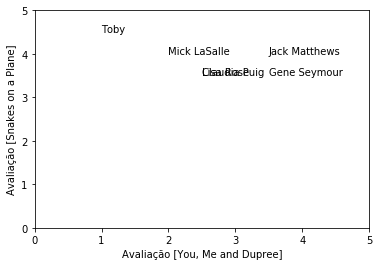

In [145]:
dupree = userDict(movie="You, Me and Dupree")
snakes = userDict(movie="Snakes on a Plane")

fig, ax = plt.subplots()
for u in users:
    if u in dupree and u in snakes:
        ax.plot(dupree[u], snakes[u])
        ax.annotate(u, (dupree[u], snakes[u]))
plt.xlabel("Avaliação [You, Me and Dupree]")
plt.ylabel("Avaliação [Snakes on a Plane]")
plt.xlim((0,5))
plt.ylim((0,5))
plt.show()

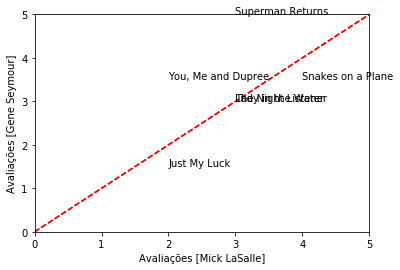

In [146]:
la_salle = userDict(user="Mick LaSalle")
seymour = userDict(user="Gene Seymour")

fig, ax = plt.subplots()
for m in movies:
    if m in la_salle and m in seymour:
        ax.plot(la_salle[m], seymour[m])
        ax.annotate(m, (la_salle[m], seymour[m]))
plt.plot([(0,0), (1,1), (2,2), (3,3), (4,4), (5,5)], 'r--')
plt.xlabel("Avaliações [Mick LaSalle]")
plt.ylabel("Avaliações [Gene Seymour]")
plt.xlim((0,5))
plt.ylim((0,5))
plt.show()

In [147]:
def recommend(dataset, users, movies, person):
    recommendations = []
    mov_ = [m_ for m_ in movies if m_ not in userDict(user=person)]
    if len(mov_) > 0:
        #Recomendações de usuários com perfil similar.
        for match, sim in best_match(users,  person):
            for midx, m in enumerate(mov_):
                arr = dataset[[uid for uid, u in enumerate(users) if u == match][0]]
                recommendations.append((m, arr[midx]*sim, person, match))
        return sorted(recommendations, key=lambda x:x[1])
    else:
        #O usuário já viu todos os filmes da plataforma.
        for match, sim in best_match(users,  person):
            for midx, m in enumerate(movies):
                arr = dataset[[uid for uid, u in enumerate(users) if u == match][0]]
                recommendations.append((m, arr[midx]*sim, person, match))
        return sorted(recommendations, key=lambda x:x[1])

# lista as recomendações de cada usuário para um filme ainda não visto na plataforma
# caso o usuário já tenha visto todos, retorna filmes já avaliados
personal_recommendations = recommend(dataset, users, movies, "Toby")

Uma lista de indicações por similaridade é gerada para cada usuário. Com essa lista indicamos qual é o filme que, segundo a similaridade e a nota atribuida na plataforma, deverá ser recomendado ao usuário na plataforma.

In [148]:
# Filme - Peso (nota na plataforma *  similaridade entre avaliações dos usuários) - Usuário1 - Usuário2
for m_, rec_, usr1, usr2 in personal_recommendations:
    print(m_+":\n Recomendação "+str(round(rec_,3))+"\t\t [ "+usr1+" / "+usr2+"]")

Just My Luck:
 Recomendação 0.0		 [ Toby / Jack Matthews]
Lady in the Water:
 Recomendação 0.0		 [ Toby / Claudia Puig]
Just My Luck:
 Recomendação 0.0		 [ Toby / Michael Phillips]
Just My Luck:
 Recomendação 1.371		 [ Toby / Gene Seymour]
Just My Luck:
 Recomendação 1.947		 [ Toby / Mick LaSalle]
Lady in the Water:
 Recomendação 2.382		 [ Toby / Lisa Rose]
Lady in the Water:
 Recomendação 2.477		 [ Toby / Michael Phillips]
Lady in the Water:
 Recomendação 2.742		 [ Toby / Gene Seymour]
Lady in the Water:
 Recomendação 2.795		 [ Toby / Jack Matthews]
Just My Luck:
 Recomendação 2.859		 [ Toby / Lisa Rose]
Just My Luck:
 Recomendação 2.866		 [ Toby / Claudia Puig]
Lady in the Water:
 Recomendação 2.921		 [ Toby / Mick LaSalle]
The Night Listener:
 Recomendação 2.972		 [ Toby / Michael Phillips]
The Night Listener:
 Recomendação 3.199		 [ Toby / Gene Seymour]
The Night Listener:
 Recomendação 3.335		 [ Toby / Lisa Rose]
The Night Listener:
 Recomendação 3.344		 [ Toby / Claudia Puig]
The

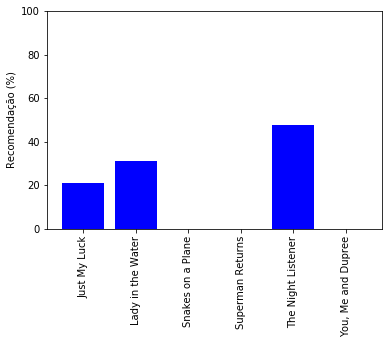

In [149]:
# passamos as indicações do usuário para analisar a probabilidade desse filme ser visto pelo usuário
def movies_recommend(recommendations, movies):
    rec = []
    for m in movies:
        m_rec = []
        for m_, w_ , p1, p2 in recommendations:
            if m == m_:
                m_rec.append(w_)
        if m_rec:
            rec.append((m, sum(m_rec)/len(m_rec)))
    return sorted([(m,100*r/sum([r_ for m_, r_ in rec])) for m, r in rec], key=lambda x:x[1])

# A probabilidade de cada filme é apresentada na plataforma
perc_rec = movies_recommend(personal_recommendations, movies)

moviearr = []
for enum, m in enumerate(movies):
    value = [rec_ for m_, rec_ in perc_rec if m_ == m]
    if value != []:
        moviearr.append((m, value[0]))
    else:
        moviearr.append((m, 0.0))

plt.bar(np.arange(0, len(movies)), [rec_ for m_, rec_ in moviearr], color="b", tick_label=[m_ for m_, rec_ in moviearr])
plt.xticks(rotation=90)
plt.ylim((0, 100))
plt.ylabel('Recomendação (%)')
plt.show()